In [13]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### [과제] 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐을 시각화하여 입증하세요 (y축이 표준편차)

In [14]:
np.random.seed(0)

pop = norm(loc = 4, scale = 0.8)
sample = pop.rvs(10000)
sample[:10]

array([5.41124188, 4.32012577, 4.78299039, 5.79271456, 5.49404639,
       3.2181777 , 4.76007073, 3.87891423, 3.91742492, 4.3284788 ])

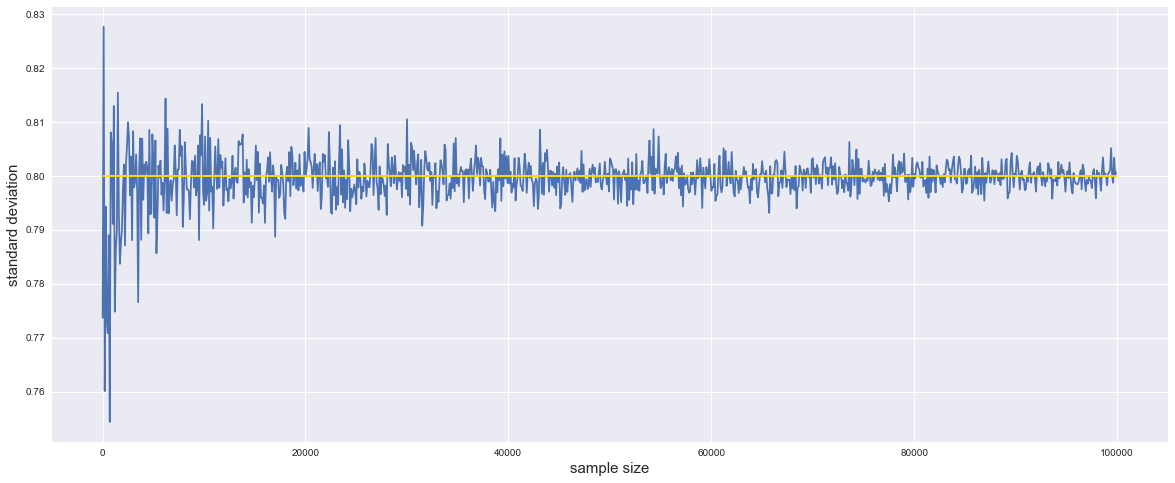

In [15]:
np.random.seed(0)

std = []
sampless = []
for i in range(10, 100001, 100):
    pop = norm(loc = 4, scale = 0.8)
    samples = pop.rvs(i)
    sampless.append(len(samples))
    std_ = np.std(samples)
    std.append(std_)

plt.style.use('seaborn')
fig = plt.figure(figsize = (20 ,8))    
plt.plot(sampless, std)
plt.xlabel('sample size', fontsize = 15)
plt.ylabel('standard deviation', fontsize = 15)
plt.hlines(0.8, 0, 100000, color = 'gold', linewidth = 2)

Text(0, 0.5, 'sample std')

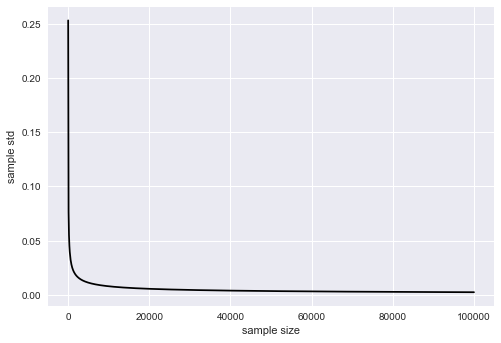

In [16]:
from scipy import stats

size_array  = np.arange(10,100100, 100)
len(size_array)
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
sample_mean_array_size = np.zeros(len(size_array))
aaa = np.zeros(len(size_array))
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
    aaa[i]= population.std() / (len(sample)**0.5)
sample_mean_array_size[:10]

# 샘플사이즈가 커질수록 표본평균이 모평균에 가까워짐
import matplotlib.pyplot as plt
plt.plot(size_array, aaa, color='black')
plt.xlabel('sample size')
plt.ylabel('sample std')

##### [과제] 샘플사이즈가 커질수록 표본평균의 흩어지는 정도가 작아져서 모평균에 가깝에 모이는 현상을 바이올린 그래프로 시각화하여 출력하세요

<AxesSubplot:xlabel='size', ylabel='sample_mean'>

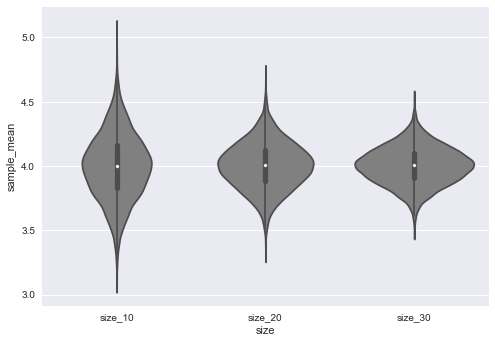

In [17]:
# 사용자 함수(표본평균 계산) : cal_sample_mean(size, n_trial)

def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = pop.rvs(size=size).mean()
    return sample_mean_array

np.mean(cal_sample_mean(size=10,n_trial=10000))

# 샘플사이즈 10
size_10 = cal_sample_mean(size=10,n_trial=10000)
size_10_df = pd.DataFrame({'sample_mean':size_10,
                          'size':np.tile('size_10',10000)})

# 샘플사이즈 20
size_20 = cal_sample_mean(size=20,n_trial=10000)
size_20_df = pd.DataFrame({'sample_mean':size_20,
                          'size':np.tile('size_20',10000)})

# 샘플사이즈 30
size_30 = cal_sample_mean(size=30,n_trial=10000)
size_30_df = pd.DataFrame({'sample_mean':size_30,
                          'size':np.tile('size_30',10000)})

# 종합
sim_result = pd.concat([size_10_df,size_20_df,size_30_df])
sim_result

sns.violinplot(x='size',y='sample_mean',
              data=sim_result,color='gray')

<AxesSubplot:xlabel='size', ylabel='mean'>

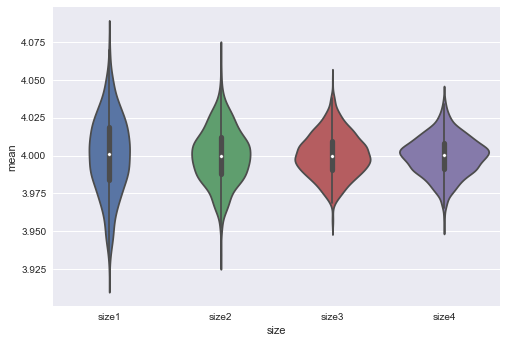

In [18]:
# 샘플사이즈가 커질수록 표본평균의 흩어지는 정도가 작아져서 모평균에 가깝게 모이는 현상을 바이올린플롯으로 시각화 하시오
def meaning(a):
    lst=[]
    for i in range(1000):
        lst.append(pop.rvs(a).mean())
    return lst

arr1 = pd.DataFrame(meaning(1000))
arr1['size']='size1'
arr2 = pd.DataFrame(meaning(2000))
arr2['size']='size2'
arr3 = pd.DataFrame(meaning(3000))
arr3['size']='size3'
arr4 = pd.DataFrame(meaning(4000))
arr4['size']='size4'
df = pd.concat([arr1,arr2,arr3,arr4])
df.columns = ['mean', 'size']
sns.violinplot(x = 'size',y = 'mean', data = df)

##### [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요

In [119]:
# 그래프를 위한 사용자 함수

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_set, f =X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f =X
    mean_X = E(X,g)
    return np.sum([(g(x_k)-mean_X)**2 *f(x_k) for x_k in x_set])

def check_prob(X):  #확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), f'minus probability'    #조건식이 True 가 아니면 문구 출력
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X): .4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label ='prob', color='lightsteelblue')
    ax.vlines(E(X), 0, 1, label='mean', color='slateblue')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()

In [120]:
#1차원 이산확률분포

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X =[x_set, f]

In [121]:
# 이항분포

from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n + 1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1 - p)**(n - x)
        else:
            return 0
    return x_set, f

In [122]:
n = 10
p = 0.3
X = Bin(n, p)

Bin_E = np.sum([x_i * f(x_i) for x_i in x_set])
print("이항분포의 기댓값: ", Bin_E )
print("이항분포의 분산: ", np.sum([(x_i - Bin_E)**2 * f(x_i) for x_i in x_set]))

이항분포의 기댓값:  4.333333333333333
이항분포의 분산:  2.2222222222222223


##### [과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요.

expected value  3.0
variance 2.1


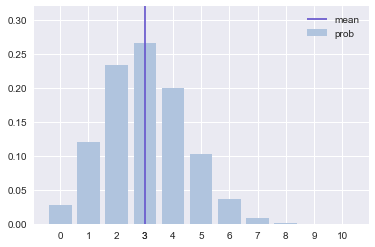

In [123]:
check_prob(X)
plot_prob(X)

##### [과제] 기하분포의 사용자 함수를 구하세요.(단, 확를변수를 1 이상 29 이하인 정수으로 설정)

In [136]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

##### [과제] 성공확률이 0.5일 때 기하분포의 기대값과 분산을 구하세요

In [137]:
p = 0.5   # p는 베르누이시행의 성공확률파라미터
X = Ge(p)

print("기하분포의 기댓값: ", 1/p)    #기하분포의 기댓값은 1/p
print("기하분포의 분산: ", (1-p)/p**2)   #분산은 (1-p)/p^2

기하분포의 기댓값:  2.0
기하분포의 분산:  2.0


##### [과제] 위 기하분포의 확률함수와 기대값을 시각화 하세요

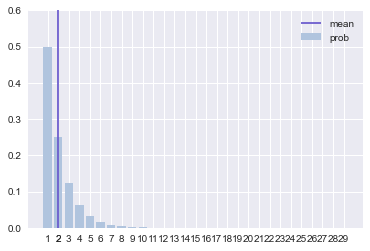

In [138]:
plot_prob(X)  #확률변수값이 커질수록 확률은 지수적으로 감소

##### [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변하는 모습을 시각화 하세요

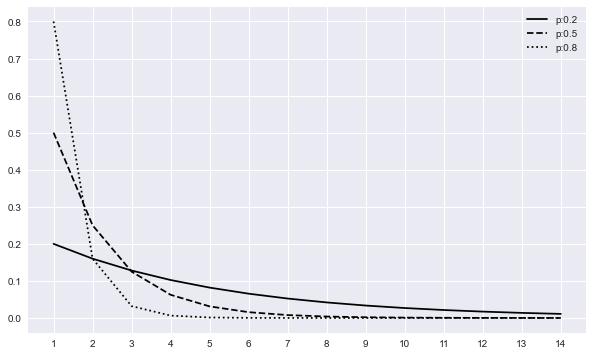

In [180]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p ,ls in zip([0.2 ,0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
ax.set_xticks(x_set)
ax.legend()
plt.show()

##### [과제] 포아송분포의 사용자 함수를 구하세요.(단, 확를변수를 1 이상 19 이하인 정수으로 설정)

In [244]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) *np.exp(-lam)
        else:
            return 0
    return x_set , f

##### [과제] 𝜆가 0.3일 때 포아송분포의 기대값과 분산을 구하세요

In [247]:
X = Poi(0.3)

# Poi_E = np.sum(x_i * f(x_i) for x_i in x_set)
# print("포아송 분포의 기댓값: ",Poi_E)
# print("포아송 분포의 분산: ",np.sum((x_i - Poi_E)**2 * f(x_i) for x_i in x_set))

check_prob(X)

expected value  0.3
variance 0.3


##### [과제] 상기 포아송분포의 확률함수와 기대값을 시각화 하세요

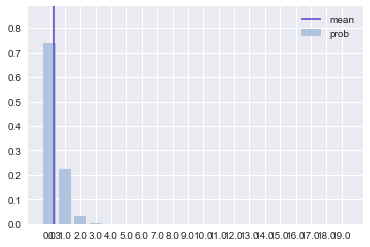

In [205]:
plot_prob(X)

##### [과제] 𝜆가 3, 5, 8로 변할 때 확률함수가 변하는 모습을 시각화 하세요

<BarContainer object of 20 artists>

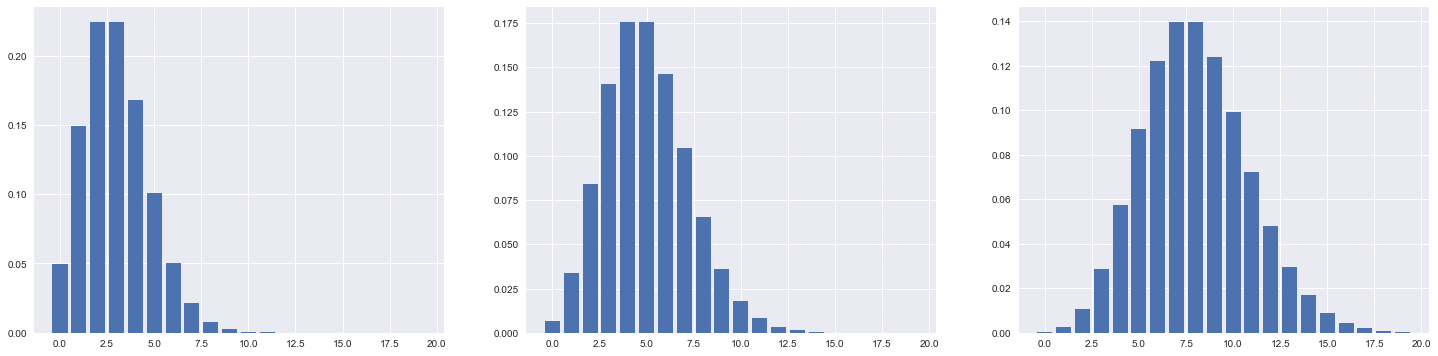

In [331]:
fig = plt.figure(figsize = (25, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.bar(np.arange(20), stats.poisson(3).pmf(np.arange(20)))
ax2.bar(np.arange(20), stats.poisson(5).pmf(np.arange(20)))
ax3.bar(np.arange(20), stats.poisson(8).pmf(np.arange(20)))

##### [과제] 베르누이, 이항, 기하 포아송분포의 사례를 각각 2개씩 제시 및 설명하세요

In [332]:
#베르누이
#빨간공7개 검정공3개가 주머니에 있을때 빨강이면 성공 검정이면 실패
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90%

# 이항분포
#4지선다형 문제 5개에서 임의로 답을 선택할때 정답을 선택한 문제수
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90% 에서 10번돌렸을때 성공할 횟수

#기하분포
#어느 야구선수가 홈런 칠 확률은 0.05라고 한다. 이 야구선수가 6타석만에 홈런칠 확률은?
#어떤 사람이 운전시험에 합격할 확률을 0.25라할 때 적어도 3번안에 시험에서 합격할 확률은?

#포아송 분포
# 고객상담 부서의 1시간 평균 상담건수는 240건일때 1분동안 상담요청 건수가 2건 들어올 경우
# 일일 평균매출이 100만 일때 1시간당 매출이 30일 확률